# Laboratorio n° 3 - Circuito 2

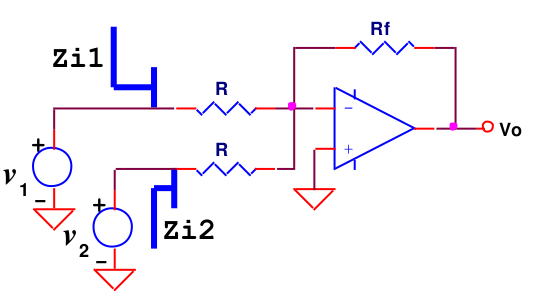

In [2]:
from IPython.display import Image

Image(filename= "img/Circuito 1.png")

In [3]:
import sympy as sym
import numpy as np
import math as m
Mfase, fg, f1, f2, fcfa= sym.symbols('M_{\phi}, f_{g}, f_{1}, f_{2}, f_{CFA}')

# fg= 2e6
# f1= 10
# f2= 5.06e6

# Calculo el margen de fase en rad debido a comodidad en el reemplazo de valores
equ= sym.Eq(1.143, 2*np.pi-np.pi-sym.atan(fg/f1)-sym.atan(fg/f2)-sym.atan(fg/fcfa))
s_fcfa= sym.solve(equ, fcfa)
valor_fcfa=s_fcfa[0].subs({fg: 2e6, f1: 10, f2: 5.06e6})
abs(valor_fcfa)

38883440.0671260

Se aplica la fórmula de la frecuencia del amplificador CFA para calcular la resistencia $R_{2}$.

$$ \omega_{CFA}= \frac{1}{C_{T}R_{2}} $$

In [4]:
wcfa, Ct, R2= sym.symbols('\omega_{CFA}, C_{T}, R2')
wcfa= 2*np.pi*fcfa
equ= sym.Eq(wcfa, 1/(Ct*R2))
s_R2= sym.solve(equ, R2)
s_R2
# Valor de R2
valor_R2=sym.Eq(R2, s_R2[0].subs({Ct:4.8e-12, fcfa:abs(valor_fcfa)}))
valor_R2

Eq(R2, 852.735245481645)

Se calcula la resistencia $R_{1}$.

In [5]:
Avf2, R1= sym.symbols('A_{vf2}, R_{1}')

equ= sym.Eq(Avf2, (1+(R2/R1)))

s_R1= sym.solve(equ, R1)

valor_R1= s_R1[0].subs({R2: valor_R2.rhs, Avf2: 20})

sym.Eq(R1, valor_R1)

Eq(R_{1}, 44.8808023937708)